In [2]:
# Machine learning and NLP libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn import metrics
import scipy as sp
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import csv
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import wordcloud
import re

### Loading Data

In [3]:
# Load the cleaned data
df = pd.read_csv('../enron_emails_cleaned.csv')

In [4]:
# Get basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445087 entries, 0 to 445086
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Date        445087 non-null  object
 1   From        445087 non-null  object
 2   To          445087 non-null  object
 3   Subject     428575 non-null  object
 4   X-From      443945 non-null  object
 5   X-To        437973 non-null  object
 6   X-Folder    445087 non-null  object
 7   Folder      445087 non-null  object
 8   X-Origin    445087 non-null  object
 9   X-Filename  441904 non-null  object
 10  Cotent      445087 non-null  object
 11  Employee    445087 non-null  object
 12  Year        445087 non-null  int64 
 13  Month       445087 non-null  int64 
dtypes: int64(2), object(12)
memory usage: 47.5+ MB


In [5]:
# Check for missing values
df.isnull().sum()

Date              0
From              0
To                0
Subject       16512
X-From         1142
X-To           7114
X-Folder          0
Folder            0
X-Origin          0
X-Filename     3183
Cotent            0
Employee          0
Year              0
Month             0
dtype: int64

In [6]:
# Drop missing values
df.dropna(inplace=True)

In [7]:
# Double check for missing values
df.isnull().sum()

Date          0
From          0
To            0
Subject       0
X-From        0
X-To          0
X-Folder      0
Folder        0
X-Origin      0
X-Filename    0
Cotent        0
Employee      0
Year          0
Month         0
dtype: int64

In [20]:
# Show random samples of the data
df.sample(5)

,Date,From,To,Subject,X-From,X-To,X-Folder,Folder,X-Origin,X-Filename,Cotent,Employee,Year,Month
44657,2001-02-12 17:10:00+00:00,vince.kaminski@enron.com,bob.lee@enron.com,Carnegie Mellon Interviews,Vince J Kaminski,Bob Lee,\Vincent_Kaminski_Jun2001_4\Notes Folders\'sen...,'sent mail,Kaminski-V,vkamins.nsf,"Bob,\n\nCan you help Kristin with interviews o...",kaminski-v,2001,2
335886,2002-01-07 22:01:34+00:00,ganapathy.ramesh@enron.com,shona.wilson@enron.com,RE: NETCO access to RisktRAC,Ramesh Ganapathy,Wilson Shona,"\ExMerge - White, Stacey W.\Deleted Items",deleted items,WHITE-S,stacy white 7-15-02.PST,"Shona,\nDebbie and I have been talking about t...",white-s,2002,1
280147,2001-04-20 10:34:00+00:00,mreuter@kslaw.com,kay.mann@enron.com,FW: This E-mail is sent at the request of M. K...,Reuter Marisa,kay mann,\Kay_Mann_June2001_1\Notes Folders\All documents,all documents,MANN-K,kmann.nsf,Kay:\n\nAttached is a revised draft of the LLC...,mann-k,2001,4
314145,2001-12-12 18:03:47+00:00,jmhorne@us.ibm.com,"bedford.chris@enron.com, patton.jeffrey@enron.com",New Site,Mike Horne,Chris Bedford,"\Joseph_Stepenovitch_Jan2002\Stepenovitch, Joe...",personal mail,Stepenovitch-J,jstepeno (Non-Privileged).pst,For those who care. The new site is up and run...,stepenovitch-j,2001,12
155695,2001-04-06 17:26:00+00:00,jeff.dasovich@enron.com,"alan.comnes@enron.com, angela.schwarz@enron.co...",Others reactions to PG&E bankruptcy,Jeff Dasovich,Alan Comnes Angela Schwarz Beverly Aden Bill V...,\Jeff_Dasovich_June2001\Notes Folders\All docu...,all documents,DASOVICH-J,jdasovic.nsf,----- Forwarded by Jeff Dasovich/NA/Enron on 0...,dasovich-j,2001,4


Using K-means clustering on the Enron Email dataset allows you to discover hidden groupings and patterns in the emails without needing labeled data. Here are some specific ways you can use K-means with this dataset:

1. Grouping Emails by Similar Content
Cluster Emails by Topic: Apply K-means to cluster emails into different groups based on their content. For instance, the model could help cluster emails into categories like financial discussions, managerial communications, HR matters, etc.
Unsupervised Topic Discovery: By examining the resulting clusters, you may discover hidden topics or themes in the emails. This can be useful for generating labels when there are no predefined categories.
2. Detecting Similar Conversations
You could use K-means to group together similar conversations based on text similarity (using features like TF-IDF, word embeddings, etc.). This helps identify similar types of communication patterns, such as follow-ups, action requests, or routine updates.
3. Identifying Email Categories without Labels
If you don't have labeled data, K-means can help segment the emails into groups that you can manually label later. These initial clusters could serve as the foundation for a later supervised classification task.
4. Creating User Profiles based on Communication
Email Content Analysis: Using K-means, you could cluster emails from a particular sender or group of senders to understand what kinds of topics they discuss most frequently.
Customer or Employee Segmentation: Segment senders/receivers based on their communication style and type of email content they interact with, revealing employee roles or departments indirectly.
5. Identifying Anomalies by Outlier Analysis
By clustering emails, you can identify "outliers" that do not fit well within any group. These could be potential anomalies, such as unusual communications, which may be helpful for fraud detection or understanding atypical behavior within the company.
6. Topic Clustering with Visualizations
After clustering, use Dimensionality Reduction Techniques (like t-SNE or PCA) to visualize the clusters in 2D or 3D space. This can provide an intuitive understanding of the grouping of similar topics and help identify how distinct each cluster is.
Steps to Use K-means on the Enron Email Dataset:
Preprocess the Emails:
Tokenization: Split the text into individual words.
Remove Stopwords: Remove common stopwords (as you’ve done).
Stemming/Lemmatization: Reduce words to their base form.
Vectorization: Convert the processed text into numerical features using methods like TF-IDF, Word2Vec, or BERT embeddings.
Determine Optimal Number of Clusters (k):
Use the Elbow Method or Silhouette Analysis to find the optimal number of clusters.
Apply K-means:
Run K-means on the numerical representation of the emails to form clusters.
Interpret the Clusters:
For each cluster, inspect the top terms or emails to understand what the cluster represents. This can help label or categorize the discovered groups.
Example Use Case
Imagine you want to understand the primary topics of communication in Enron's internal emails. By using K-means:

You preprocess and vectorize the email content.
You run K-means with, say, k=5, and you end up with 5 clusters.
By examining the top keywords in each cluster, you notice:
Cluster 1 deals with energy trading.
Cluster 2 is focused on legal issues.
Cluster 3 covers employee benefits and HR.
Cluster 4 has project management discussions.
Cluster 5 includes general social interactions.
This clustering can provide insights into communication dynamics and allow you to group emails based on content automatically.

Benefits of Using K-means
Unsupervised: No need for labeled data.
Scalability: K-means works well on a large dataset, making it suitable for a dataset as large as Enron's.
Insightful Grouping: It helps uncover hidden structures in the dataset, which can be used for further analysis, reporting, or as a step toward a supervised learning task.
K-means is especially useful if your goal is to explore the dataset and identify distinct, recurring topics or themes that you weren't aware of beforehand.

- 'Re', 'FW', 'Fwd' (used in replies or forwarded emails),
- 'EOL' (could stand for "End of Line" or similar),
- 'E', 'mail' (email related),
- 'PLEASE', 'Ahead' (which might appear frequently in email communication).

In [11]:
stopwords = nltk.corpus.stopwords.words('english')  # Load the list of stopwords from NLTK library
newstopwords = ['Re', 'FW', 'Fwd', 'EOL', 'E', 'mail', 'PLEASE', 'Ahead']   # Add more stopwords specific to the emails
for i in newstopwords:  # Add the new stopwords to the list
    stopwords.append(i)

### Word Cloud

A word cloud is a visual representation of word frequency, where more frequent words appear larger and bolder.

#### Visualize the most common words in the `subject` columns

' '.join(): The .join() function combines all elements of the df['Subject'].values (which is a list of subject strings) into one long string with each subject separated by a space (' ').

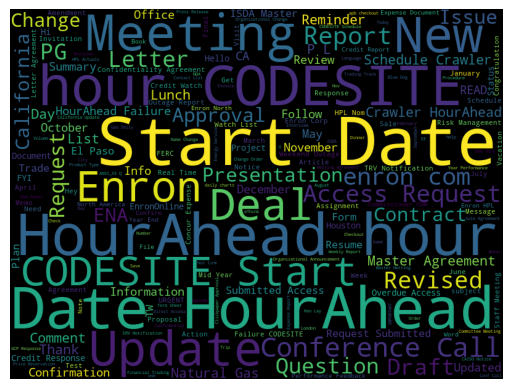

In [12]:
subjects = ' '.join(df['Subject'].values)   # Join all the `subjects` values store in dataframe into one string
fig, ax = plt.subplots()    # Create a figure and a set of subplots
wc = wordcloud.WordCloud(width = 800, height = 600, max_words = 200, stopwords = stopwords).generate(subjects)  # Create a word cloud object, stopwords are removed
ax.imshow(wc)
# This line turns off the axes around the word cloud. Removing the axes makes the visualization cleaner and more focused on the word cloud itself.
plt.axis('off')
plt.show()

#### Visualize the most common words in `content` columns

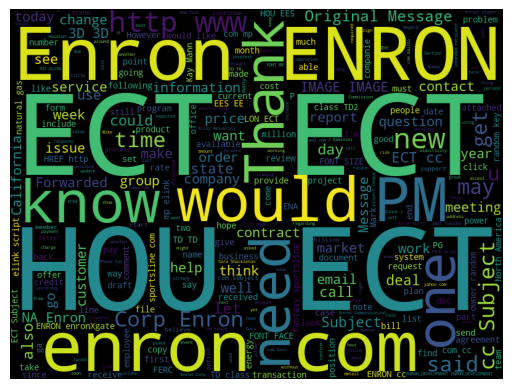

In [13]:
content = ' '.join(df['Content'].sample(5000).values) # Join all the `content` values store in dataframe into one string
fig, ax = plt.subplots()
wc = wordcloud.WordCloud(width = 800, height = 600, max_words = 300, stopwords = stopwords).generate(content)
ax.imshow(wc)
plt.axis('off')
plt.show()

In [ ]:
nltk.download('wordnet')

In [ ]:
nltk.download('punkt')

In [ ]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

### NLP

In [ ]:
# preparing the lemmatization function
lemmatizer = WordNetLemmatizer()

In [ ]:
# Tokenizing and lemmatizing the text to prepare for classification and sentiment analysis
text = []
for msg in df['Cotent'].values:
    msg_tokens = word_tokenize(msg)
    msg_tokens = [token.lower() for token in msg_tokens if token.isalpha()]
    msg_tokens = [word for word in msg_tokens if not word in stopwords]
    msg_tokens = [lemmatizer.lemmatize(word) for word in msg_tokens]
    
    text.append(msg_tokens)

In [ ]:
text = [' '.join(message) for message in text]

In [ ]:
# vectorizing the data using Tfidfvectorizer
vectorizer = TfidfVectorizer(min_df = 5, max_features = 5000, stop_words = stopwords, norm = 'l1')
data = vectorizer.fit_transform(text)

In [ ]:
# Normalizing the data
data_norm = normalize(data)

In [ ]:
print(data_norm.shape)

In [ ]:
# Decomposition of the data and decreasing alot of features
svd = TruncatedSVD(n_components = 2, n_iter = 10, random_state = 42)
datasvd = svd.fit_transform(data_norm)

In [ ]:
datasvd.shape

In [ ]:
# Use the Elbow method to define the optimal number of clusters for kmeans clustering
max_iter = 1000
sumsquares = []
number_clusters = range(1,11)
for i in number_clusters:
    kmeans = KMeans(n_clusters = i, max_iter = max_iter, n_init = 'auto')
    kmeans.fit(datasvd)
    sumsquares.append(kmeans.inertia_)
plt.figure(figsize = (8,6))
plt.plot(number_clusters, sumsquares)
plt.xlabel('Clusters', fontsize = 14)
plt.ylabel('Sum of Squared Distances', fontsize = 14)
plt.title('Elbow Method', fontsize = 16)
plt.show()

In [ ]:
n_clusters = 6
clf = KMeans(n_clusters = n_clusters,init = 'random', max_iter = max_iter, tol = 0.0001, algorithm = 'lloyd', n_init = 'auto', random_state = 42)
fittedkmeans = clf.fit_predict(datasvd)
centroids = clf.cluster_centers_

In [ ]:
# A diagram showing the clusters
plt.figure(figsize = (8,6))
plt.scatter(datasvd[:,0], datasvd[:,1], c = fittedkmeans, s = 50, cmap = 'viridis', alpha = 0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], s = 150, c = 'black', alpha = 0.8)
plt.annotate('Cluster 0', xy = (centroids[0][0], centroids[0][1]), xytext = (centroids[0][0] + 0.02, centroids[0][1] + 0.03), color = 'white', fontsize = 12)
plt.annotate('Cluster 1', xy = (centroids[1][0], centroids[1][1]), xytext = (centroids[1][0] + 0.02, centroids[1][1] + 0.02), color = 'white', fontsize = 12)
plt.annotate('Cluster 2', xy = (centroids[2][0], centroids[2][1]), xytext = (centroids[2][0] - 0.05, centroids[2][1] - 0.06), color = 'white', fontsize = 12)
plt.annotate('Cluster 3', xy = (centroids[3][0], centroids[3][1]), xytext = (centroids[3][0] - 0.01, centroids[3][1] - 0.07), color = 'white', fontsize = 12)
plt.annotate('Cluster 4', xy = (centroids[4][0], centroids[4][1]), xytext = (centroids[4][0] - 0.03, centroids[4][1] + 0.04), color = 'white', fontsize = 12)
plt.annotate('Cluster 5', xy = (centroids[5][0], centroids[5][1]), xytext = (centroids[5][0] - 0.03, centroids[5][1] + 0.03), color = 'white', fontsize = 12)

plt.show()

In [ ]:
# extract top words in every cluster using the inverse_transform method
original_space_centroids = svd.inverse_transform(kmeans.cluster_centers_)
order_centroids = original_space_centroids.argsort()[:, ::-1] #(10,5000)
terms = vectorizer.get_feature_names_out()

for i in range(n_clusters):
    print(f"Cluster {i}: ", end="")
    for ind in order_centroids[i, :20]:
        print(f"{terms[ind]} ", end="")
        
    print()

### Anomaly Detection

In [22]:
# Get edge weights (number of emails between each pair)
edge_weights = {}

senders = df['From']
recipients = df['To']

for sender, recipient in zip(senders, recipients):
    if pd.notna(sender) and pd.notna(recipient):
        edge_weights[(sender, recipient)] = edge_weights.get((sender, recipient), 0) + 1

# Convert the edge weights to a DataFrame for analysis
edge_df = pd.DataFrame(list(edge_weights.items()), columns=['Edge', 'Weight'])

# Calculate statistical measures
mean_weight = edge_df['Weight'].mean()
std_weight = edge_df['Weight'].std()

# Define an anomaly as emails with frequency > mean + 3 * std (or below a threshold)
anomaly_threshold = mean_weight + 3 * std_weight
anomalies = edge_df[edge_df['Weight'] > anomaly_threshold]

print("Anomalous email interactions:")
print(anomalies)

Anomalous email interactions:
                                                    Edge  Weight
9         (soblander@carrfut.com, soblander@carrfut.com)     838
47     (enron.announcements@enron.com, eligible.emplo...     139
56     (enron.announcements@enron.com, all_ena_egm_ei...     536
72     (carrfuturesenergy@carrfut.com, rvujtech@carrf...     133
75      (john.lavorato@enron.com, john.arnold@enron.com)     117
...                                                  ...     ...
86978         (dana.davis@enron.com, kdavis2075@aol.com)     120
88808     (scott.neal@enron.com, sneal12@mindspring.com)     239
88817   (scott.neal@enron.com, kimberly.brown@enron.com)     136
89284   (drew.fossum@enron.com, martha.benner@enron.com)     644
91840   (chris.dorland@enron.com, dan.dorland@enron.com)     146

[270 rows x 2 columns]
